<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Python_Minicurso/blob/main/Cuadernos_Jupyter/Sol_Num_de_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><center>Resolución Numérica de Ecuaciones diferenciales Ordinarias</b></center></h1>

<h3><b><center>Mario I. Caicedo</b></center></h3>

* Multitud de problemas de interés llevan a tener que resolver ecuaciones diferenciales ordinarias

* Estaremos interesados en sistemas dinámicos. Es decir, en sistemas descritos por problemas de valores iniciales de la forma

$$\frac{d\mathbf{x}}{dt}=\mathbf{f}(\mathbf{x},t)\,,\qquad{}x(0)=x_0\quad{}\mathbf{x}\in\Re^n\,,t\in\Re$$

* Estrategia inicial, discretizar la región de integración en $N$ pares
${(\mathbf{x}_0,t_0),(\mathbf{x}_1,t_1),...,(\mathbf{x}_{N-1},t_{N-1})}$, con $t_{k+1}-t_k=h$, *intervalo de discretización*
* Sustituir la derivada por alguna aproximación discreta
* Convertir la ecuación diferencial en una ecuación en diferencias y resolver.


In [ ]:
%matplotlib inline

# additional imports for outputting to the IPython session
from IPython.display import HTML 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

-------------------------------------------------
-------------------------------------------------

## Método de Euler

* Antes de entrar en materia discutamos el método de **Euler**

* Discretización de la derivada
$$\frac{dx}{dt}\approx{}\frac{\Delta{}x}{\Delta{}t}=\frac{x_{n+1}-x_{n}}{h}$$
* De allí

$$x_{n+1}-x_n=f(t_n,x_n)\,h+O(h^2)$$

* Que implica

$$x_{n+1}=x_n+f(t_n,x_n)\,h$$

* Esta última fórmula debe interpretarse como una iteración que permite calcular el valor de $x$ en el instante $t_{n+1}$ a partir de los valores de en el instante anterior ($t_{n}$ y $x_n$)

* La fórmula de iteración es un ejemplo de un **método de integración explícito** de ODE's
 
* El método de Euler tiene una interpretación geométrica muy sencilla. Cada punto se obtiene del anterior por un segmento rectilíneo.



-------------------------------------------------
-------------------------------------------------

## Ejemplo (Método de Euler)

* Encontrar la solución al problena de valores iniciales: 
$$\dot{x}=-x/\tau\,,\qquad{}x(0)=x_0\,,$$ 
* En este caso, 

$$f(x,t)=-x/\tau$$

* La solución exacta de la ecuación es:

$$x(t)=x_0\,e^{-t/\tau}$$

In [ ]:
def f(x,tau): # f(x,t)
  val=-x/tau
  return val

In [ ]:
# Parámetros del sistema y condición inicial
tau=2
x_0=10.

**Integrador**

In [ ]:
def Euler(x_0,t,tau):
  x=np.zeros(len(t))
  for p in range(len(t)):
    if p==0: 
      x[p]=x_0
    else:
      x[p]=x[p-1]+f(x[p-1],tau)*.5
      #print(p)
  return x

Discretización del intervalo temporal

In [ ]:
dt = 0.5
t = np.arange(0.0, 20, dt) # crea arreglo temporal 0..20 con muestreo dt

Llamada al integrador y cálculo de la solución exacta para efectos de comparación

In [ ]:
x=Euler(x_0,t,tau)

y=x_0*np.exp(-t/tau) # Solución analítica

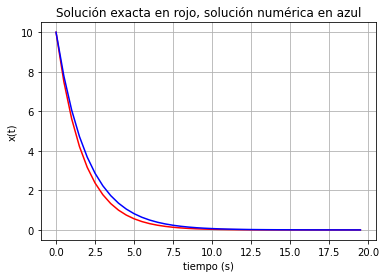

In [ ]:
# Salida gráfica

plt.plot(t, x,'r')
plt.plot(t,y,'b')
plt.xlabel('tiempo (s)')
plt.ylabel('x(t)')
plt.title('Solución exacta en rojo, solución numérica en azul')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

--------------------------------------------------------
--------------------------------------------------------

## **Método de Runge Kuta**

* Método explícito que actualiza el valor de $x(t)$ a través de una aproximación geométrica. 

* Las fórmulas que sintetizan la iteración son las siguientes:

$$x_{n+1}=x_n+\frac{1}{6}\,h\,\left[k_1+2k_2+2k_3+k_4\right]$$

$$k_1=f(t_n,x_n)$$

$$k_2=f(t_n+\frac{h}{2},x_n+h\frac{k_1}{2})$$

$$k_3=f(t_n+\frac{h}{2},x_n+h\frac{k_2}{2})$$

$$k_4=f(t_n+\frac{h}{2},x_n+hk_3)$$


* Nótese que si $k_1=k_2=k_3=k_4$ el método se reduce al de Euler.



**IMPORTANTE**

El método de Runge Kuta aplica a sistemas de primer orden.

La funcionalidad de operaciones vectoriales de Python permiten utilizar el método sin mayor modificación

Solo hay que asegurar que las definiciones de los arreglos sean las correctas

-------------------------------------------------
-------------------------------------------------

## Método de Runge Kuta. Ejemplo 1

* Repetir la integración del problema de valores iniciales que se resolvió con el método de Euler:

$$\dot{x}=-x/\tau\,,\qquad{}x(0)=x_0\,$$ 


La función para la integración se coinstruye siguiendo las fórmulas de iteración dadas anteriormente

In [ ]:
def Rung_Kuta(x_0,t,dt,tau): # Integrador (escalar) por método de Runge Kuta
  x=np.zeros(len(t))
  for p in range(len(t)):
    if p==0: 
      x[p]=x_0  
    else:
      k_1=f(x[p-1],tau)
      k_2=f(x[p-1]+dt*k_1/2.,tau)
      k_3=f(x[p-1]+dt*k_2/2.,tau)
      k_4=f(x[p-1]+dt*k_3,tau)
      Delta=(k_1+2.*k_2+2.*k_3+k_4)/6.
      x[p]=x[p-1]+Delta*dt
      #print(p)
  return x

Para fines de comparación se llama al integrador con los mismos parámetos con que se invocó al integrador Euler.

In [ ]:

u=Rung_Kuta(x_0,t,dt,tau)


Al comparar la solución RG con la analítica no hay diferencia aparente

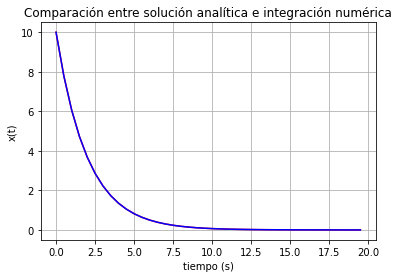

In [ ]:
plt.plot(t, u,'r')
plt.plot(t,y,'b')
plt.xlabel('tiempo (s)')
plt.ylabel('x(t)')
plt.title('Comparación entre solución analítica e integración numérica')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

La diferencia entre la solución RG y la exacta solo es visible restando las soluciones y multiplicando por un factor de amplificación de 100

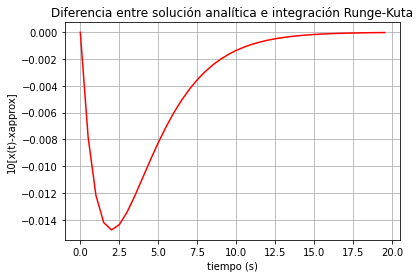

In [ ]:
plt.plot(t, 100*(y-u),'r')
#plt.plot(t,y,'b')
plt.xlabel('tiempo (s)')
plt.ylabel('10[x(t)-xapprox]')
plt.title('Diferencia entre solución analítica e integración Runge-Kuta')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

En la siguiente función, se adapata RG a un sistema de dimensión dos 

In [ ]:
def Rung_Kuta_2D(X_0,t,dt,tau): # Integrador por método de Runge Kuta
  X=np.zeros([2, len(t)]) #x=np.zeros(len(t))
  for p in range(len(t)):
    if p==0: 
      X[:,p]=X_0  
    else:
      k_1=F(X[:,p-1],tau)
      k_2=F(X[:,p-1]+dt*k_1/2.,tau)
      k_3=F(X[:,p-1]+dt*k_2/2.,tau)
      k_4=F(X[:,p-1]+dt*k_3,tau)
      Delta=(k_1+2.*k_2+2.*k_3+k_4)/6.
      X[:,p]=X[:,p-1]+Delta*dt
      #print(p)
  return X


## Método de Runge Kuta. Ejemplo 2

Oscilador Armónico: 

$$\ddot{x}+\omega_0^2x=0$$

Reducción de orden 

$$
\begin{pmatrix}
\dot{v}\\
\dot{x}
\end{pmatrix}=\begin{pmatrix}
-\omega_o^2\,x\\
v
\end{pmatrix}
$$

Notación para el integrador Rung_Kuta_2D

$$
\begin{pmatrix}
\dot{s}_1\\
\dot{s}_0
\end{pmatrix}=\begin{pmatrix}
-\omega_o^2\,s_0\\
s_1
\end{pmatrix}
$$

-------------------------------------------------------

Definición de la Función que define el sistema de interés

In [ ]:
def F(s,omega_2): # f(x,t)
  val=np.array((0.,0.))
  val[0]=s[1]
  val[1]=-omega_2*s[0]
  return val


Preparación de parámetros, condiciones iniciales e intervalo de integración

In [ ]:
dt = 0.001
t = np.arange(0.0, 1, dt) # crea arreglo temporal 0..20 con muestreo dt

#-----------------------
# Parámetros del sistema y condiciones iniciales
frec=1.  #Hz
omega_0=2.*np.pi
omega_2=omega_0**2

y_0=[]
y_0=[1.,0.]¨


Llamada al Integrador

In [ ]:
u=Rung_Kuta_2D(y_0,t,dt,omega_2)

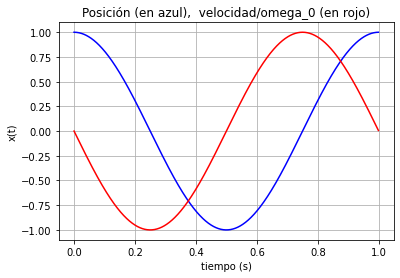

In [ ]:
plt.plot(t, u[0,:],'b')
plt.plot(t,u[1,:]/omega_0,'r')
plt.xlabel('tiempo (s)')
plt.ylabel('x(t)')
plt.title('Posición (en azul),  velocidad/omega_0 (en rojo)')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

--------------------------------------------------------
--------------------------------------------------------

# **Integración con la biblioteca scipy**

* El análisis numérico es una rama especializada de las matemáticas aplicadas y constantemente se desarrollan métodos sumamente sofisticados 

* La biblioteca scipy incorpora rutinas de integración muy desarrolladas.



--------------------------------------------------------
--------------------------------------------------------

## Integrate de scypi. Ejemplo

Ecuación de movimiento

$$
\ddot{\theta}=-\frac{L}{g}\,sen\theta
$$

Sistema equivalente

$$
\begin{pmatrix}
\dot{\theta}\\
\dot{\omega}
\end{pmatrix}=\begin{pmatrix}
\omega\\
-\frac{L}{g}\,sen\theta
\end{pmatrix}
$$

Parámetros del sistema

In [ ]:

g = 9.8  # acceleration due to gravity, in m/s^2
L = 1.5  # length of pendulum in m

M = 1.0  # mass of pendulum 1 in kg

Sistema de primer orden

In [ ]:
def derivs(w, t):

    dydt = np.zeros_like(w)

    dydt[0] = w[1]

    dydt[1]=-(L/g)*np.sin(w[0])

    return dydt

Condiciones iniciales

In [ ]:
theta = -30.0 # grados
omega = -2. # Velocidad angular inicial

Theta = np.radians([theta, omega])


Intervalo de Integración

In [ ]:
# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.5
t = np.arange(0.0, 40, dt)


Llamada al integrador **integrate** de scipy

In [ ]:
y = integrate.odeint(derivs, Theta, t)

x = L*np.sin(y[:, 0])
y = -L*np.cos(y[:, 0])

Salida animada

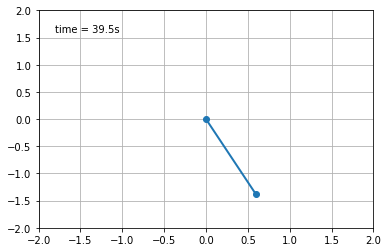

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):

    thisx = [0, x[i]]
    thisy = [0, y[i]]


    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('pendulum.mp4', fps=15)

HTML(ani.to_jshtml())
#plt.show()